In [1]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')
# Mount Google Drive and set directory
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


# New section

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [3]:
# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/NLP-Projet-Karim/arabic_dataset_classifiction.csv')

In [4]:
print(dataset['targe'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: targe, dtype: int64


In [5]:
print(dataset['text'].head(10))

0    بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...
1    قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...
2    أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...
3    اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...
4    تزال صناعة الجلود في المغرب تتبع الطريقة التقل...
5    مصطفى الصوفي انطلقت أمس فعاليات الدورة الثالثة...
6    الاتحاد الاشتراكي تحيي الفنانة اللبنانية نجوى ...
7    أقدمت كاثريونا وايت حبيبة الممثل جيم كاري على ...
8    أحمد الريدي تطور جديد شهدته قضية الفنانة زينة ...
9    أخبارنا المغربية بشراكة بين مؤسسة البشير للتعل...
Name: text, dtype: object


In [6]:
print(dataset['text'][1])

قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر عملها على الفن بل عملت مع أحد المتخصصين لإطلاق نوع جديد من الشاي سيصبح متوفرا ابتداء من الشهر المقبل في سلسلة مقاهي ستاربكس ونقلت وسائل إعلام أمريكية عن رئيس مجلس إدارة ستاربكس هاورد شولتز ووينفري إعلانهما عن ابتكار نوع جديد من الشاي يحمل اسم الذي سيباع ابتداء من أبريل نيسان المقبل في مقاهي ستاربكس وتيفانا بأمريكا وكندا وتعتزم ستاربكس التبرع بعائدات بيع هذا الشاي لأكاديمية أسستها وينفري وتعنى بتوفير فرص تعليم للشبان


In [7]:
df0 = dataset[dataset['targe']==0]
df1 = dataset[dataset['targe']==1]
df2 = dataset[dataset['targe']==2]
df3 = dataset[dataset['targe']==3]
df4 = dataset[dataset['targe']==4]

In [8]:
print (df0)

                                                    text  targe
0      بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...      0
1      قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...      0
2      أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...      0
3      اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...      0
4      تزال صناعة الجلود في المغرب تتبع الطريقة التقل...      0
...                                                  ...    ...
13733  مريم بلخياط من مهامي التنسيق بين المشتغلين في ...      0
13734  بدءا من السيناريو وصولا إلى الشاشة مرورا بـ جي...      0
13735  علمت الصباح ”، أن البرنامج السينمائي إف بي إم ...      0
13736  ذكر موقع كود نيوز أن النجمة المصرية سمية الخشا...      0
13737  احتفل أخيرا المخرج طارق الإدريسي بحفل زفافه لي...      0

[13738 rows x 2 columns]


In [9]:
print(df0.iloc[1, 0])
print(df0.head())  # View the first few rows
print(df0.columns)  # Check the column names

قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر عملها على الفن بل عملت مع أحد المتخصصين لإطلاق نوع جديد من الشاي سيصبح متوفرا ابتداء من الشهر المقبل في سلسلة مقاهي ستاربكس ونقلت وسائل إعلام أمريكية عن رئيس مجلس إدارة ستاربكس هاورد شولتز ووينفري إعلانهما عن ابتكار نوع جديد من الشاي يحمل اسم الذي سيباع ابتداء من أبريل نيسان المقبل في مقاهي ستاربكس وتيفانا بأمريكا وكندا وتعتزم ستاربكس التبرع بعائدات بيع هذا الشاي لأكاديمية أسستها وينفري وتعنى بتوفير فرص تعليم للشبان
                                                text  targe
0  بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...      0
1  قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...      0
2  أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...      0
3  اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...      0
4  تزال صناعة الجلود في المغرب تتبع الطريقة التقل...      0
Index(['text', 'targe'], dtype='object')


In [10]:
print (df1)

                                                    text  targe
13738  سرقة محل للمجوهرات ببني ملالاعتدى لصوص على حار...      1
13739  اضطرت عناصر الشرطة القضائية بالرشيدية السبت ال...      1
13740  تمكنت عناصر المركز الترابي للدرك الملكي بالدرو...      1
13741  استقبل قسم المستعجلات بالمستشفى المحلي لمدينة ...      1
13742  مهاجرون كاميرونيون قتلوا حارس قيسارية وقاصر ذب...      1
...                                                  ...    ...
30461  قام الدرك الملكي مؤخرا ببنسليمان بتفكيك ورشة م...      1
30462  تمك نت الشرطة الكتلونية اليوم الاثنين من إيقاف...      1
30463  تمكنت عناصر الشرطة الوطنية الإسبانية بتعاون مع...      1
30464  تمكنت عناصر الشرطة القضائية من فك لغز العثور ع...      1
30465  ندد الائتلاف ضد الاعتداءات الجنسية على الأطفال...      1

[16728 rows x 2 columns]


In [11]:
print(df1.iloc[1, 0])
print(df1.head())  # View the first few rows
print(df1.columns)  # Check the column names

اضطرت عناصر الشرطة القضائية بالرشيدية السبت الماضي إلى إطلاق النار لإيقاف مروجي مخدرات يتحدران من الشمال بعد أن واجهاها بالحجارة خلال عملية مطاردة لسيارتهما وصفت بالهوليودية انتهت باعتقال أحدهما وفرار الثاني وحسب مصادر الصباح فإن هذه العملية مكنت الشرطة القضائية من حجز أزيد من كيلوغرام من مخدر الشيرا كانت مخبأة بمكان مخصص لبيع المستحثات تعود ملكيته لشخص بالمنطقة تبين أنه مروج للمخدرات بالجملة وتعود تفاصيل القضية عندما تفاجأت عناصر السد القضائي بمدخل أرفود ليلا بسيارة من نوع مرسديس على متنها شخصان رفض سائقها التوقف وغير وجهته ليتم مواجهتها بالأسلاك الشائكة ما تسبب في انفجار إحدى عجلاتها ورغم ذلك قادها سائقها بسرعة كبيرة صوب منطقة مظلمة وعلى طريق غير معبدة ما صعب من مهمة الشرطة لتعقبها وإيقافها واستنفرت الواقعة المصالح الأمنية بالرشيدية سيما بعد التأكد من أن السيارة كانت تحمل كميات مهمة من المخدرات لتسند المهمة للشرطة القضائية التي انتقلت إلى دوار بالمنطقة يرجح أن المتهمين قصداه بعد فرارهما من السد القضائي وأوضحت المصادر أن عناصر الشرطة ظلت مرابضة بالمكان ليلة كاملة وبعد الفجر بساعة عاين

In [12]:
print (df2)

                                                    text  targe
30466  وقعت شركة أليانس هوسبيتاليتي ”، فرع الاستثمار ...      2
30467  كشفت مجموعة فورد سيارتها الجديدة بي ماكس في ال...      2
30468  أفاد مكتب الصرف تراجع قيمة صادرات الفوسفاط ومش...      2
30469  حازت أخيرا مجموعة بي إم ترمينال »، التي تدير ا...      2
30470  طرحت الخطوط الملكية المغربية أخيرا مجموعة من ا...      2
...                                                  ...    ...
44696  أخبارنا المغربية جمال مايس خطاب العرش الذي ألق...      2
44697  أكد رئيس الحكومة السيد عبد الإله ابن كيران الي...      2
44698  أخبارنا المغربية منح صندوق النقد العربي اليوم ...      2
44699  أخبارنا المغربية أفاد تقرير للمديرية الجهوية ل...      2
44700  أخبارنا المغربية ما يزال الهولدينغ الملكي المت...      2

[14235 rows x 2 columns]


In [13]:
print(df2.iloc[1, 0])
print(df2.head())  # View the first few rows
print(df2.columns)  # Check the column names

كشفت مجموعة فورد سيارتها الجديدة بي ماكس في السوق المغربية آخر منتجات المصنع الأمريكي للسيارات التي تأتي لتعزز سوق السيارات مونو سبايس في المغرب وتتوفر السيارة الجديدة فقط بمحرك بنزين من صنف فورد لتر الذي صنف كأحد أفضل المحركات الحديثة كما تأتي شبيهة بصنف مونديو في ما يتعلق بالمصبغة الأمامية الواسعة والمصابيح المعدلة إلى جانب ذلك توفر السيارة الجديدة مجموعة من التقنيات منها إمكانية فتح السيارة بنظام فري كاي دون مفاتيح ويأتي تصميم السيارة شبيها بتصميم فييستا ”، بينما يأتي شكلها الخارجي الأمامي بتصميم مستقبلي بينما تعتبر حقيبة السيارة الواسعة لترا إحدى أهم النقاط التي تميزها إضافة إلى طريقة تصميم المقاعد خصوصا الأمامية منها إذ أن المساحة الواسعة بين عجلة القيادة والمقعد تجعلها مريحة أكثر للسائق يشار إلى أن السيارة متوفرة في المغرب في نموذج تيتانيوم ”، بثمن في حدود ألف درهم يختلف قليلا حسب المواصفات
                                                    text  targe
30466  وقعت شركة أليانس هوسبيتاليتي ”، فرع الاستثمار ...      2
30467  كشفت مجموعة فورد سيارتها الجديدة بي ماكس في ال...      2


In [14]:
print (df3)

                                                    text  targe
44701  استنفرت التصريحات التي خرج بها رئيس الحكومة عب...      3
44702  دخل فريق العدالة والتنمية في مجلس النواب على ا...      3
44703  أقر رئيس الحكومة عبد الإله بنكيران بأن طريقة ص...      3
44704  حط طائرة الملك محمد السادس اليوم الأحد بنيودله...      3
44705  أكد الأمين العام لحزب الاستقلال حميد شباط على ...      3
...                                                  ...    ...
65201  أخبارنا المغربية ذكرت مصادر متطابقة أن هناك اج...      3
65202  أخبارنا المغربية اعترف عبدالإله بنكيران رئيس ا...      3
65203  أخبارنا المغربية متابعة استأنف حزب الاستقلال ش...      3
65204  عبدالاله بوسحابة أخبارنا المغربية بعد أن أقاله...      3
65205  شكل الخلاف بين الحكومة والملك لإرضاء العلمانيي...      3

[20505 rows x 2 columns]


In [15]:
print(df3.iloc[1, 0])
print(df3.head())  # View the first few rows
print(df3.columns)  # Check the column names

دخل فريق العدالة والتنمية في مجلس النواب على الخط في قضية تصويت الشبيبة الاتحادية لفائدة عضوية البوليساريو في الاتحاد الدولي للشبيبات الاشتراكية في مؤتمره المنعقد بالعاصمة الألبانية تيرانا متهما الاتحاديين بـ الخيانة العظمى للوطن ووجه محمد سالم البيهي النائب عن فريق العدالة سؤالا كتابيا لصلاح الدين مزوار وزير الشؤون الخارجية والتعاون من أجل فتح تحقيق عاجل بخصوص دعم شبيبة حزبية لخصوم الوحدة الوطنية معتبرا أن الأمر يعد خرقا واضحا للدستور وخيانة عظمى للوطن السؤال الذي اطلعت هسبريس عليه شدد على ضرورة فتح تحقيق عاجل حول ما يرو له عن شبيبة الاتحاد الاشتراكي وفي ظرفية حساسة جدا وفي وقت يتلاحم فيه الشعب المغربي بقيادة جلالة الملك من أجل الدفاع عن وحدة وطننا الغالي مردفا وذلك على إثر تصويت بعض أعضاء شبيبة الإتحاد الاشتراكي لصالح خصوم الوحدة الترابية في الشبيبة العالمية وما خلف من استياء لأنصار الوحدة الوطنية والشعب المغربي كافة وتساءل النائب البرلماني عن التدابير التي ينوي مزوار القيام بها حفاظا على الوحدة الترابية وردع كل من سولت له نفسه استغلال بعض الأحزاب لظلم الوطن والشعب بحسب تعبيره وزاد ا

In [16]:
print (df4)

                                                     text  targe
65206   حقق فريق تشيلسي فوزا ثمينا على مانشستر سيتي في...      4
65207   لا يعتزم اللاعبون المسلمون في المنتخب الفرنسي ...      4
65208   كشفت صحيفة دير شبيغل الألمانية الجمعة أن فوز ا...      4
65209   كشفت تقارير إخبارية أن البرازيلي نيمار نصح زمي...      4
65210   في ما يلي البرنامج الكامل لنهائيات كأس اوروبا ...      4
...                                                   ...    ...
111723  اللاعب تأخر في العودة إلى التداريب والمدرب غاض...      4
111724  المشرف العام لحسنية أكادير قال إنه سيغادر الفر...      4
111725  نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...      4
111726  ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...      4
111727  رضخ أحمد أهمو رئيس أمل تيزنيت لكرة القدم لضغوط...      4

[46522 rows x 2 columns]


In [17]:
print(df4.iloc[1, 0])
print(df4.head())  # View the first few rows
print(df4.columns)  # Check the column names

لا يعتزم اللاعبون المسلمون في المنتخب الفرنسي الصوم خلال شهر رمضان لتزامنه مع بطولة يورو وذكرت صحيفة ليكيب الرياضية الفرنسية اليوم الأربعاء أن اللاعبين المسلمين في المنتخب الفرنسي مثل بول بوغبا نغولو كانتي وباكاري سانيا اتفقوا على ذلك مع المسؤولين في المنتخب الفرنسي وبدأ رمضان في يونيو حزيران الجاري وسينتهي في يوليو تموز المقبل وتقام مباريات بطولة يورو خلال الفترة من يونيو حزيران حتى يوليو تموز ويلعب الديوك مباراة الافتتاح أمام نظيره الروماني في إستاد دو فرانس بضاحية سان دوني في باريس الجمعة المقبل
                                                    text  targe
65206  حقق فريق تشيلسي فوزا ثمينا على مانشستر سيتي في...      4
65207  لا يعتزم اللاعبون المسلمون في المنتخب الفرنسي ...      4
65208  كشفت صحيفة دير شبيغل الألمانية الجمعة أن فوز ا...      4
65209  كشفت تقارير إخبارية أن البرازيلي نيمار نصح زمي...      4
65210  في ما يلي البرنامج الكامل لنهائيات كأس اوروبا ...      4
Index(['text', 'targe'], dtype='object')


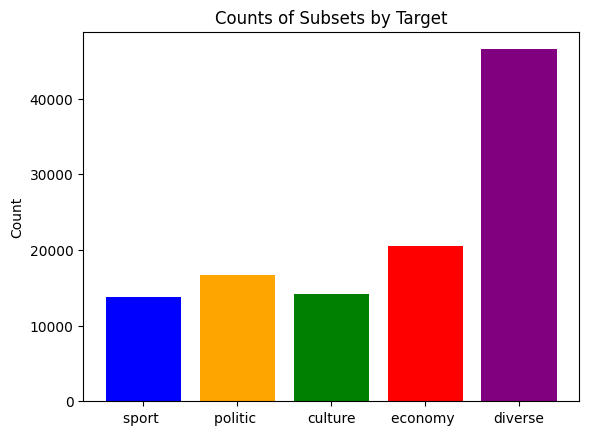

In [18]:
counts = [len(df0), len(df1), len(df2), len(df3), len(df4)]
plt.bar(['sport ', 'politic ', 'culture', 'economy ', 'diverse'], counts, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('Count')
plt.title('Counts of Subsets by Target')
plt.show()

In [19]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# Load and preprocess data
stemmer = ISRIStemmer()
stop_words = set(stopwords.words('arabic'))
print (stop_words)

{'آذار', 'هَذِي', 'فيم', 'عشرين', 'به', 'ة', 'كما', 'إلا', 'قبل', 'أضحى', 'عليه', 'ثماني', 'كاد', 'مكانكم', 'مرّة', 'ليرة', 'أمامكَ', 'يفعلون', 'إنا', 'تجاه', 'ح', 'آهٍ', 'أى', 'حجا', 'ظلّ', 'مع', 'ل', 'ارتدّ', 'لدن', 'إياكما', 'بين', 'ذلكما', 'ليسوا', 'أكثر', 'هاتي', 'ما برح', 'حسب', 'بؤسا', 'صراحة', 'عما', 'حمٌ', 'ين', 'كأن', 'أو', 'بكن', 'فرادى', 'قاطبة', 'حاي', 'خمسون', 'ب', 'أنّى', 'إياكم', 'ليسا', 'مئة', 'مه', 'لكن', 'حدَث', 'هيا', 'ضاد', 'تلكم', 'هَذا', 'واو', 'عدَّ', 'أربعة', 'ثلاثمائة', 'أبريل', 'ثم', 'شيكل', 'حيَّ', 'عاشر', 'جير', 'تسعمائة', 'رأى', 'إليكما', 'كلَّا', 'أنتم', 'بل', 'كي', 'بهما', 'أربع', 'عوض', 'أنت', 'لئن', 'بس', 'حقا', 'مساء', 'درهم', 'تحت', 'لعل', 'ثمّ', 'كثيرا', 'تانِك', 'لم', 'هناك', 'تفعلون', 'بعد', 'بسّ', 'أخٌ', 'أيا', 'مادام', 'كذلك', 'كيف', 'ن', 'ثلاثون', 'التي', 'ثمة', 'أخبر', 'بها', 'شتان', 'خاء', 'سبعمئة', 'علم', 'إمّا', 'نون', 'منها', 'ق', 'وما', 'غادر', 'أسكن', 'سبحان', 'ثاء', 'حاشا', 'بما', 'ومن', 'إلّا', 'أنًّ', 'كلا', 'تسعمئة', 'إياهما', 'ثمان'

In [21]:
# Function to clean text
def remove_stop_words(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    return " ".join([stemmer.stem(word) for word in words if word not in stop_words])

In [22]:
# Ensure the 'text' column contains valid strings
dataset['text'] = dataset['text'].astype(str)  # Convert all values to strings

# Handle cases where the text might be "nan" (converted from NaN)
dataset['text'] = dataset['text'].replace('nan', '', regex=False)

# Apply the cleaning function to the 'text' column
dataset['cleaned_text'] = dataset['text'].apply(remove_stop_words)

In [23]:
# Split dataset into features (X) and labels (y)
X = dataset['cleaned_text']
y = dataset['targe']
print(X)
print(y)

0         استوديوه رزز صحراء رزك آثر ولل ربط يضء نهى خرج...
1         قرر نجم امر وبر نفر قصر عمل الف عمل تخصص إطلاق...
2         خبر غرب وزا صور شملال لهب نجم غرب دوز حمس ازد ...
3         خبر غرب قال راهيم رشد حمي سعد جرد ان وكل ضحة ك...
4         تزل صنع جلد غرب تبع طرق قلد يدي خدم واد طبع ائ...
                                ...                        
111723    لعب أخر عود درب درب غضب فرق سفر غد رتغال يخض ف...
111724    شرف عام لحس كادير قال غدر فرق حصل رخص قال ارج ...
111725    نسب اله نتج ودد صحو رجء آخر صيح أهل نخب اثر دج...
111726    حتض ربط فتر ماب ليز قبل دور فرق لهك جلد جمع فر...
111727    رضخ حمد همو رئس امل تيز لكر قدم ضغط جماهير فرق...
Name: cleaned_text, Length: 111728, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
111723    4
111724    4
111725    4
111726    4
111727    4
Name: targe, Length: 111728, dtype: int64


In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9547122527521704
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2748
           1       0.95      0.97      0.96      3346
           2       0.91      0.90      0.90      2847
           3       0.91      0.91      0.91      4101
           4       0.99      0.99      0.99      9304

    accuracy                           0.95     22346
   macro avg       0.94      0.94      0.94     22346
weighted avg       0.95      0.95      0.95     22346



In [28]:
# Save the vectorizer and model for future use
with open('/content/drive/MyDrive/NLP-Projet-Karim/vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)
with open('/content/drive/MyDrive/NLP-Projet-Karim/model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [29]:
# Load and predict with saved model (example usage)
with open('/content/drive/MyDrive/NLP-Projet-Karim/vectorizer.pkl', 'rb') as vec_file:
    loaded_vectorizer = pickle.load(vec_file)
with open('/content/drive/MyDrive/NLP-Projet-Karim/model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [30]:
# Example prediction
sample_text = "بين أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ثم الرباط والبيضاء انتهى المخرج المغربي سهيل بن بركة من تصوير مشاهد عمله السينمائي الجديد الذي خصصه لتسليط الضوء عن حياة الجاسوس الإسباني دومينغو باديا الذي عاش فترة من القرن التاسع عشر بالمغرب باسم علي باي هذا الفيلم الذي اختار له مخرجه عنوان حلم خليفة يصور حياة علي باي العباسي الذي ما زال أحد أحياء طنجة يحمل اسمه عاش حياة فريدة متنكرا بشخصية تاجر عربي من سلالة الرسول صلى الله عليه وسلم فيما كان يعمل جاسوسا لحساب إسبانيا وكشف مخرج الفيلم سهيل بن بركة في تصريح لهسبريس أن الفيلم السينمائي دخل مرحلة التوضيب التي تتم خارج المغرب مبرزا أن الفيلم الذي يروي حياة الجاسوس الإسباني دومينغو باديا منذ أن قرر من طنجة بدء رحلاته نحو عدد من المناطق في العالم الإسلامي بداية القرن العشرين سيكون جاهزا بعد شهرين ويجمع الفيلم السينمائي عددا من الممثلين من مختلف الجنسيات واختار لدور البطولة الممثلة السينمائية الإيطالية كارولينا كريشنتيني للقيام بدور الإنجليزية الليدي هستر ستانهوب التي اشتهرت في الكتب الغربية بـ زنوبيا والتي عاشت بدورها بالدول العربية وارتبطت بعلي باي بعلاقة عاطفية إضافة إلى وجوه سينمائية معروفة وعن اختيار المخرج المغربي لحياة علي باي العباسي يوضح في تصريح لوكالة الأنباء الفرنسية هذه الشخصية عاشت أحداثا مشوقة كثيرة تستحق أن تسلط عليها الأضواء مشيرا إلى أن الفيلم سيحمل الكثير من المفاجآت لا سيما أن البطل قتل على يد امرأة دست له السم خلال رحلة الحج وأضاف شخصية طموحة وشجاعة ومثقفة ومذهلة في آن واحد كان يرى نفسه مستكشفا في أول الأمر نال علي باي إعجاب السلطان بعلمه فجعله من المقربين منه في ظرف وجيز ودعاه إلى اللحاق به إلى فاس وبرحيله إلى فاس تنتهي قصته مع طنجة وعاش علي باي العباسي بمدينة طنجة على أنه رجل مسلم أصله من الشام ونال ثقة الجميع في هذه المدينة حيث تم تشييد تمثال له في عروسة الشمال نظرا لتمكنه من بعض العلوم خاصة علم الفلك الذي مكنه من رصد كسوف الشمس الذي تزامن مع وجوده في طنجة فكان لعلمه دور كبير ساعده في إخفاء هويته كما أبان هذا الأمر أيضا عن تراجع كبير في ميدان العلم والمعرفة لدى المغاربة والمسلمين بصفة عامة"
cleaned_sample = remove_stop_words(sample_text)
sample_tfidf = loaded_vectorizer.transform([cleaned_sample])
predicted_label = loaded_model.predict(sample_tfidf)
print(f"Predicted Label for '{sample_text}': {predicted_label[0]}")

Predicted Label for 'بين أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ثم الرباط والبيضاء انتهى المخرج المغربي سهيل بن بركة من تصوير مشاهد عمله السينمائي الجديد الذي خصصه لتسليط الضوء عن حياة الجاسوس الإسباني دومينغو باديا الذي عاش فترة من القرن التاسع عشر بالمغرب باسم علي باي هذا الفيلم الذي اختار له مخرجه عنوان حلم خليفة يصور حياة علي باي العباسي الذي ما زال أحد أحياء طنجة يحمل اسمه عاش حياة فريدة متنكرا بشخصية تاجر عربي من سلالة الرسول صلى الله عليه وسلم فيما كان يعمل جاسوسا لحساب إسبانيا وكشف مخرج الفيلم سهيل بن بركة في تصريح لهسبريس أن الفيلم السينمائي دخل مرحلة التوضيب التي تتم خارج المغرب مبرزا أن الفيلم الذي يروي حياة الجاسوس الإسباني دومينغو باديا منذ أن قرر من طنجة بدء رحلاته نحو عدد من المناطق في العالم الإسلامي بداية القرن العشرين سيكون جاهزا بعد شهرين ويجمع الفيلم السينمائي عددا من الممثلين من مختلف الجنسيات واختار لدور البطولة الممثلة السينمائية الإيطالية كارولينا كريشنتيني للقيام بدور الإنجليزية الليدي هستر ستانهوب التي اشتهرت في الكتب الغربية بـ زنوبيا والتي عاشت بدورها 

In [31]:
# Example prediction
sample_text = "اضطرت عناصر الشرطة القضائية بالرشيدية السبت الماضي إلى إطلاق النار لإيقاف مروجي مخدرات يتحدران من الشمال بعد أن واجهاها بالحجارة خلال عملية مطاردة لسيارتهما وصفت بالهوليودية انتهت باعتقال أحدهما وفرار الثاني وحسب مصادر الصباح فإن هذه العملية مكنت الشرطة القضائية من حجز أزيد من كيلوغرام من مخدر الشيرا كانت مخبأة بمكان مخصص لبيع المستحثات تعود ملكيته لشخص بالمنطقة تبين أنه مروج للمخدرات بالجملة وتعود تفاصيل القضية عندما تفاجأت عناصر السد القضائي بمدخل أرفود ليلا بسيارة من نوع مرسديس على متنها شخصان رفض سائقها التوقف وغير وجهته ليتم مواجهتها بالأسلاك الشائكة ما تسبب في انفجار إحدى عجلاتها ورغم ذلك قادها سائقها بسرعة كبيرة صوب منطقة مظلمة وعلى طريق غير معبدة ما صعب من مهمة الشرطة لتعقبها وإيقافها واستنفرت الواقعة المصالح الأمنية بالرشيدية سيما بعد التأكد من أن السيارة كانت تحمل كميات مهمة من المخدرات لتسند المهمة للشرطة القضائية التي انتقلت إلى دوار بالمنطقة يرجح أن المتهمين قصداه بعد فرارهما من السد القضائي وأوضحت المصادر أن عناصر الشرطة ظلت مرابضة بالمكان ليلة كاملة وبعد الفجر بساعة عاينت السيارة المبحوث عنها تسلك طريقا غير معبد بعد إصلاح عجلاتها لتتم مطاردتها إلا أن العناصر الأمنية ستفاجأ بمقاومة شديدة من قبل المتهمين اللذين واجهاها بالحجارة كادت أن تتسبب في خسائر وجروح خطيرة للعناصر الأمنية ما اضطر أحدهم إلى إشهار مسدسه وإطلاق رصاصة تحذيرية الأمر الذي أربك المتهمين إذ أوقفا السيارة وحاولا الفرار إلا أن الشرطة اعتقلت أحدهما في حين نجح الثاني في الفرار وشددت المصادر على أن الشرطة أثناء تفتيش السيارة تبين لها خلوها من المخدرات كما اتضح أنها تحمل أرقاما مزورة وأثناء الاستماع إليه اعترف المتهم أنه أفرغ المخدرات لدى شخص يملك مكانا لبيع المستحثات فدل عناصر الشرطة على مكانه ليعتقل صاحبه وبعد تفتيشه حجزت أكياسا كبيرة بها مخدر الشيرا تبين أنها تزن كيلوغرام ووضع المتهمان تحت تدابير الحراسة النظرية إذ تبين بعد تنقطيهما أنهما من ذوي السوابق واعترف المتهم الأول أنه يتحدر من مدينة بالشمال وأنه كلف رفقة شريكه الفار بنقل المخدرات المحجوزة إلى المتهم الثاني الذي يعد مروجا لها بالمنطقة مشيرا إلى أنه وزميله توهما أنهما نجوا من الاعتقال بعد فرارهما من السد القضائي بأرفود دون أن يتوقعا أنهما سيكونان مطاردين من قبل شرطة الرشيدية أما المتهم الثاني فاعترف أنه مروج للمخدرات بالجملة إذ يتسلمها من المتهم وشريكه ويخفيها بمحله التجاري قبل أن يعيد توزيعها على مروجي المخدرات بالمنطقة وبعد تعميق البحث معهما أحيل المتهمان على وكيل الملك بالمحكمة الابتدائية بالرشيدية بجنحة حيازة المخدرات وترويجها في حين أصدرت الشرطة مذكرة بحث في حق المتهم الفار مصطفى لطفي"
cleaned_sample = remove_stop_words(sample_text)
sample_tfidf = loaded_vectorizer.transform([cleaned_sample])
predicted_label = loaded_model.predict(sample_tfidf)
print(f"Predicted Label for '{sample_text}': {predicted_label[0]}")

Predicted Label for 'اضطرت عناصر الشرطة القضائية بالرشيدية السبت الماضي إلى إطلاق النار لإيقاف مروجي مخدرات يتحدران من الشمال بعد أن واجهاها بالحجارة خلال عملية مطاردة لسيارتهما وصفت بالهوليودية انتهت باعتقال أحدهما وفرار الثاني وحسب مصادر الصباح فإن هذه العملية مكنت الشرطة القضائية من حجز أزيد من كيلوغرام من مخدر الشيرا كانت مخبأة بمكان مخصص لبيع المستحثات تعود ملكيته لشخص بالمنطقة تبين أنه مروج للمخدرات بالجملة وتعود تفاصيل القضية عندما تفاجأت عناصر السد القضائي بمدخل أرفود ليلا بسيارة من نوع مرسديس على متنها شخصان رفض سائقها التوقف وغير وجهته ليتم مواجهتها بالأسلاك الشائكة ما تسبب في انفجار إحدى عجلاتها ورغم ذلك قادها سائقها بسرعة كبيرة صوب منطقة مظلمة وعلى طريق غير معبدة ما صعب من مهمة الشرطة لتعقبها وإيقافها واستنفرت الواقعة المصالح الأمنية بالرشيدية سيما بعد التأكد من أن السيارة كانت تحمل كميات مهمة من المخدرات لتسند المهمة للشرطة القضائية التي انتقلت إلى دوار بالمنطقة يرجح أن المتهمين قصداه بعد فرارهما من السد القضائي وأوضحت المصادر أن عناصر الشرطة ظلت مرابضة بالمكان ليلة كاملة 

In [32]:
# Example prediction
sample_text = "كشفت مجموعة فورد سيارتها الجديدة بي ماكس في السوق المغربية آخر منتجات المصنع الأمريكي للسيارات التي تأتي لتعزز سوق السيارات مونو سبايس في المغرب وتتوفر السيارة الجديدة فقط بمحرك بنزين من صنف فورد لتر الذي صنف كأحد أفضل المحركات الحديثة كما تأتي شبيهة بصنف مونديو في ما يتعلق بالمصبغة الأمامية الواسعة والمصابيح المعدلة إلى جانب ذلك توفر السيارة الجديدة مجموعة من التقنيات منها إمكانية فتح السيارة بنظام فري كاي دون مفاتيح ويأتي تصميم السيارة شبيها بتصميم فييستا ”، بينما يأتي شكلها الخارجي الأمامي بتصميم مستقبلي بينما تعتبر حقيبة السيارة الواسعة لترا إحدى أهم النقاط التي تميزها إضافة إلى طريقة تصميم المقاعد خصوصا الأمامية منها إذ أن المساحة الواسعة بين عجلة القيادة والمقعد تجعلها مريحة أكثر للسائق يشار إلى أن السيارة متوفرة في المغرب في نموذج تيتانيوم ”، بثمن في حدود ألف درهم يختلف قليلا حسب المواصفات"
cleaned_sample = remove_stop_words(sample_text)
sample_tfidf = loaded_vectorizer.transform([cleaned_sample])
predicted_label = loaded_model.predict(sample_tfidf)
print(f"Predicted Label for '{sample_text}': {predicted_label[0]}")

Predicted Label for 'كشفت مجموعة فورد سيارتها الجديدة بي ماكس في السوق المغربية آخر منتجات المصنع الأمريكي للسيارات التي تأتي لتعزز سوق السيارات مونو سبايس في المغرب وتتوفر السيارة الجديدة فقط بمحرك بنزين من صنف فورد لتر الذي صنف كأحد أفضل المحركات الحديثة كما تأتي شبيهة بصنف مونديو في ما يتعلق بالمصبغة الأمامية الواسعة والمصابيح المعدلة إلى جانب ذلك توفر السيارة الجديدة مجموعة من التقنيات منها إمكانية فتح السيارة بنظام فري كاي دون مفاتيح ويأتي تصميم السيارة شبيها بتصميم فييستا ”، بينما يأتي شكلها الخارجي الأمامي بتصميم مستقبلي بينما تعتبر حقيبة السيارة الواسعة لترا إحدى أهم النقاط التي تميزها إضافة إلى طريقة تصميم المقاعد خصوصا الأمامية منها إذ أن المساحة الواسعة بين عجلة القيادة والمقعد تجعلها مريحة أكثر للسائق يشار إلى أن السيارة متوفرة في المغرب في نموذج تيتانيوم ”، بثمن في حدود ألف درهم يختلف قليلا حسب المواصفات': 2


In [33]:
# Example prediction
sample_text = "دخل فريق العدالة والتنمية في مجلس النواب على الخط في قضية تصويت الشبيبة الاتحادية لفائدة عضوية البوليساريو في الاتحاد الدولي للشبيبات الاشتراكية في مؤتمره المنعقد بالعاصمة الألبانية تيرانا متهما الاتحاديين بـ الخيانة العظمى للوطن ووجه محمد سالم البيهي النائب عن فريق العدالة سؤالا كتابيا لصلاح الدين مزوار وزير الشؤون الخارجية والتعاون من أجل فتح تحقيق عاجل بخصوص دعم شبيبة حزبية لخصوم الوحدة الوطنية معتبرا أن الأمر يعد خرقا واضحا للدستور وخيانة عظمى للوطن السؤال الذي اطلعت هسبريس عليه شدد على ضرورة فتح تحقيق عاجل حول ما يرو له عن شبيبة الاتحاد الاشتراكي وفي ظرفية حساسة جدا وفي وقت يتلاحم فيه الشعب المغربي بقيادة جلالة الملك من أجل الدفاع عن وحدة وطننا الغالي مردفا وذلك على إثر تصويت بعض أعضاء شبيبة الإتحاد الاشتراكي لصالح خصوم الوحدة الترابية في الشبيبة العالمية وما خلف من استياء لأنصار الوحدة الوطنية والشعب المغربي كافة وتساءل النائب البرلماني عن التدابير التي ينوي مزوار القيام بها حفاظا على الوحدة الترابية وردع كل من سولت له نفسه استغلال بعض الأحزاب لظلم الوطن والشعب بحسب تعبيره وزاد المتحدث قائلا لم يعد هناك مجال للمزايدات ولا مجال للتطاول على وحدة الوطن أو خيراته تحت أي ذريعة كانت مضيفا فالسبيل الوحيد هو العمل النزيه والشفاف وربط المسؤولية بالمحاسبة تجسيدا لإرادة جلالة الملك التي أكدها في أكثر من مناسبة وتم توجيه اتهامات لـ أبناء لشكر بمعاداة مصالح المغرب في قضية الصحراء المغربية بعد تصويتهم لفائدة عضوية البوليساريو في الاتحاد الدولي للشبيبات الاشتراكية على الرغم من أن هؤلاء والذين اختاروا لهم اسم اتحاد طلبة الساقية الحمراء كانوا قد قدموا توصية للمؤتمر تدعو إلى ضرورة إنهاء ما يعتبرونه احتلالا مغربيا للصحراء منذ سنة يذكر أن المصطفى عماي عضو المكتب الوطني لشبيبة حزب الوردة كان قد عل على صورة له نشرها بـ فيسبوك بالقول أثناء التصويت على عضوية اتحاد طلبة الساقية الحمراء كعضو ملاحظ في اليوزي مرحبا به عضوا من شأنه الدفع بالحوار في أفق إيجاد حل لنزاع الصحراء الغربية في إطار حل سياسي ترعاه الأمم المتحدة ويحظى بموافقة الطرفين"
cleaned_sample = remove_stop_words(sample_text)
sample_tfidf = loaded_vectorizer.transform([cleaned_sample])
predicted_label = loaded_model.predict(sample_tfidf)
print(f"Predicted Label for '{sample_text}': {predicted_label[0]}")

Predicted Label for 'دخل فريق العدالة والتنمية في مجلس النواب على الخط في قضية تصويت الشبيبة الاتحادية لفائدة عضوية البوليساريو في الاتحاد الدولي للشبيبات الاشتراكية في مؤتمره المنعقد بالعاصمة الألبانية تيرانا متهما الاتحاديين بـ الخيانة العظمى للوطن ووجه محمد سالم البيهي النائب عن فريق العدالة سؤالا كتابيا لصلاح الدين مزوار وزير الشؤون الخارجية والتعاون من أجل فتح تحقيق عاجل بخصوص دعم شبيبة حزبية لخصوم الوحدة الوطنية معتبرا أن الأمر يعد خرقا واضحا للدستور وخيانة عظمى للوطن السؤال الذي اطلعت هسبريس عليه شدد على ضرورة فتح تحقيق عاجل حول ما يرو له عن شبيبة الاتحاد الاشتراكي وفي ظرفية حساسة جدا وفي وقت يتلاحم فيه الشعب المغربي بقيادة جلالة الملك من أجل الدفاع عن وحدة وطننا الغالي مردفا وذلك على إثر تصويت بعض أعضاء شبيبة الإتحاد الاشتراكي لصالح خصوم الوحدة الترابية في الشبيبة العالمية وما خلف من استياء لأنصار الوحدة الوطنية والشعب المغربي كافة وتساءل النائب البرلماني عن التدابير التي ينوي مزوار القيام بها حفاظا على الوحدة الترابية وردع كل من سولت له نفسه استغلال بعض الأحزاب لظلم الوطن والش

In [34]:
# Example prediction
sample_text = "لا يعتزم اللاعبون المسلمون في المنتخب الفرنسي الصوم خلال شهر رمضان لتزامنه مع بطولة يورو وذكرت صحيفة ليكيب الرياضية الفرنسية اليوم الأربعاء أن اللاعبين المسلمين في المنتخب الفرنسي مثل بول بوغبا نغولو كانتي وباكاري سانيا اتفقوا على ذلك مع المسؤولين في المنتخب الفرنسي وبدأ رمضان في يونيو حزيران الجاري وسينتهي في يوليو تموز المقبل وتقام مباريات بطولة يورو خلال الفترة من يونيو حزيران حتى يوليو تموز ويلعب الديوك مباراة الافتتاح أمام نظيره الروماني في إستاد دو فرانس بضاحية سان دوني في باريس الجمعة المقبل"
cleaned_sample = remove_stop_words(sample_text)
sample_tfidf = loaded_vectorizer.transform([cleaned_sample])
predicted_label = loaded_model.predict(sample_tfidf)
print(f"Predicted Label for '{sample_text}': {predicted_label[0]}")

Predicted Label for 'لا يعتزم اللاعبون المسلمون في المنتخب الفرنسي الصوم خلال شهر رمضان لتزامنه مع بطولة يورو وذكرت صحيفة ليكيب الرياضية الفرنسية اليوم الأربعاء أن اللاعبين المسلمين في المنتخب الفرنسي مثل بول بوغبا نغولو كانتي وباكاري سانيا اتفقوا على ذلك مع المسؤولين في المنتخب الفرنسي وبدأ رمضان في يونيو حزيران الجاري وسينتهي في يوليو تموز المقبل وتقام مباريات بطولة يورو خلال الفترة من يونيو حزيران حتى يوليو تموز ويلعب الديوك مباراة الافتتاح أمام نظيره الروماني في إستاد دو فرانس بضاحية سان دوني في باريس الجمعة المقبل': 4
